# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Loading the data

In [4]:
data=pd.read_csv(r'C:\DAm project\Data-and-Ml-basic\Project\winequalitytest.csv')
data.head()

,type,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                  6497 non-null object
FixedAcidity          6487 non-null float64
VolatileAcidity       6489 non-null float64
CitricAcid            6494 non-null float64
ResidualSugar         6495 non-null float64
chlorides             6495 non-null float64
FreeSulfurDioxide     6497 non-null float64
TotalSulfurDioxide    6497 non-null float64
density               6497 non-null float64
pH                    6488 non-null float64
sulphates             6493 non-null float64
alcohol               6497 non-null float64
quality               6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [4]:
#Shape of our data
data.shape

(6497, 13)

In [5]:
#Data types of each attribute we have 1 categorical variable that is type
data.dtypes

type                   object
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [6]:
data.size

84461

# Cleaning the dataset

### Checking Missing values

In [7]:
#We have 6497 rows and 13 collumn in our data set before cleaning 
data.shape

(6497, 13)

In [8]:
#Checking for Null values
data.isnull().sum()

type                   0
FixedAcidity          10
VolatileAcidity        8
CitricAcid             3
ResidualSugar          2
chlorides              2
FreeSulfurDioxide      0
TotalSulfurDioxide     0
density                0
pH                     9
sulphates              4
alcohol                0
quality                0
dtype: int64

We have 38 NAN values in our dataset

In [9]:
#Replacing all nan values with 0 
data.fillna(0,inplace=True)

In [10]:
#Checking again for nan values
data.isnull().sum()

type                  0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

Now we dont have any missing values in our dataset

### Checking for duplicate values 

In [11]:
duplicate=(data.duplicated())
data[duplicate].head()

,type,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
39,white,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.9999,3.21,0.36,8.6,5


In [12]:
data[duplicate].shape

(1168, 13)

We have 1168 duplicate values in our dataset

In [13]:
#Removing duplicate values
data.drop_duplicates(inplace=True)
#New data shape
data.shape

(5329, 13)

After removing our duplicate values we have 5329 values in our dataset

# Data Visualization

### Finding Categorical Data from the dataset

In [14]:
#To findout categorical data only from the dataset
catdata=data.select_dtypes(include=['object']).copy()
catdata.head()

,type
0,white
1,white
2,white
3,white
6,white


We have only one categorical variable that is type

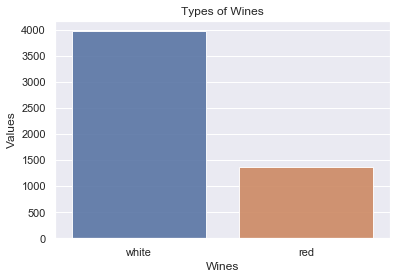

In [15]:
#Plotting a barplot for the categorical data
typecount = catdata['type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(typecount.index, typecount.values, alpha=0.9)
plt.title('Types of Wines')
plt.ylabel('Values', fontsize=12)
plt.xlabel('Wines', fontsize=12)
plt.show()

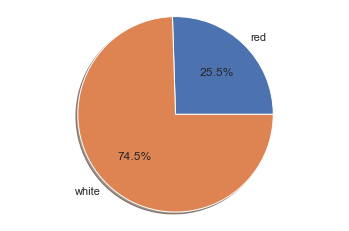

In [16]:
#Plotting a pie chart for the categorical data
labels = catdata['type'].astype('category').cat.categories.tolist()
counts = catdata['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### Visualizing the quality of wine in our dataset

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

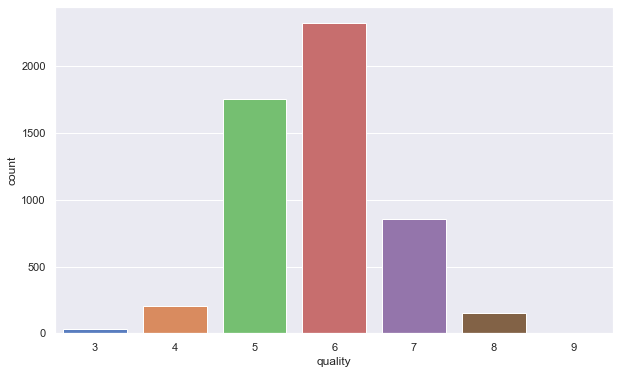

In [17]:
#Plotting a countplot to analyze the count regarding each value of quality
plt.figure(figsize=(10, 6))
sns.countplot(data["quality"], palette="muted")
data["quality"].value_counts()

We could analyze most of the wine in our dataset have quality of 6 then 5 and 7

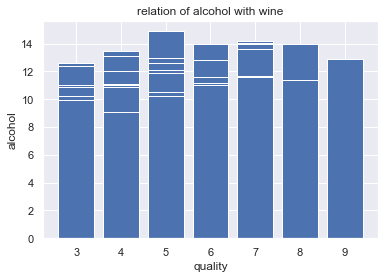

In [18]:
# checking the variation of alcohol in the different qualities of wine
plt.bar(data['quality'], data['alcohol'])
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

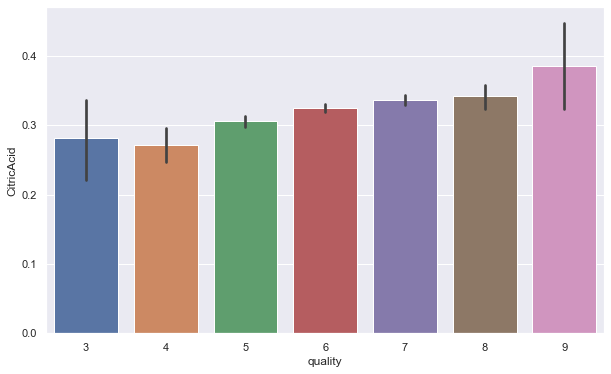

In [19]:
 #Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'CitricAcid', data = data)

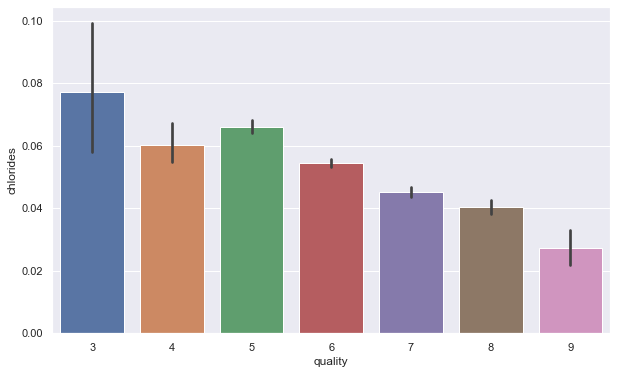

In [20]:
#Composition of chloride go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

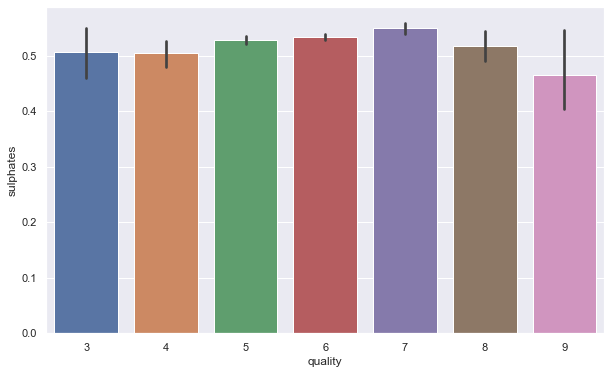

In [21]:
#Sulphates level goes higher first and drop after 7 with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

## Univariate Analysis

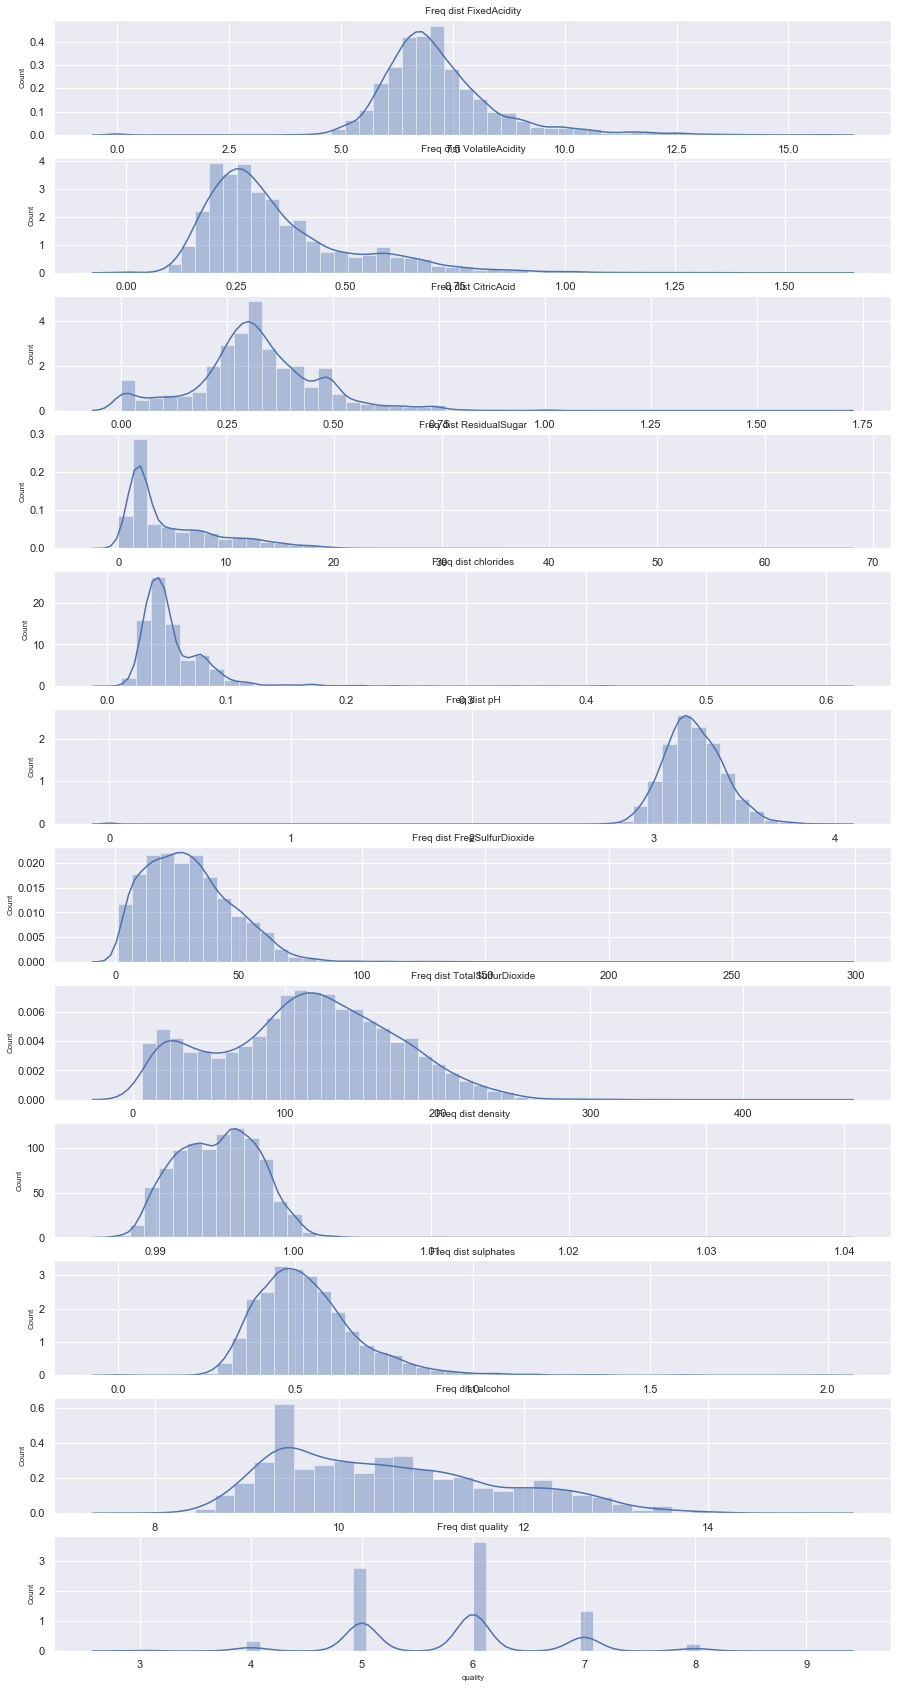

In [22]:
#Univariate distribution
col_names= ['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','chlorides','pH','FreeSulfurDioxide','TotalSulfurDioxide','density','sulphates','alcohol','quality']

fig, ax = plt.subplots(len(col_names), figsize=(15,30))

for i, col_val in enumerate(col_names):
    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

NormallySkewed- FixedAcidity

PositivelySkewed-pH

NegativelySkewed-VolatileAcidity,CitricAcid,sulphates,chlorides,ResidualSugar,SulfurDioxide,TotalSulfurDioxide,density,alcohal

Most of the graphs are negatively skewed

## Bivariate Analysis

<Figure size 1008x1008 with 0 Axes>

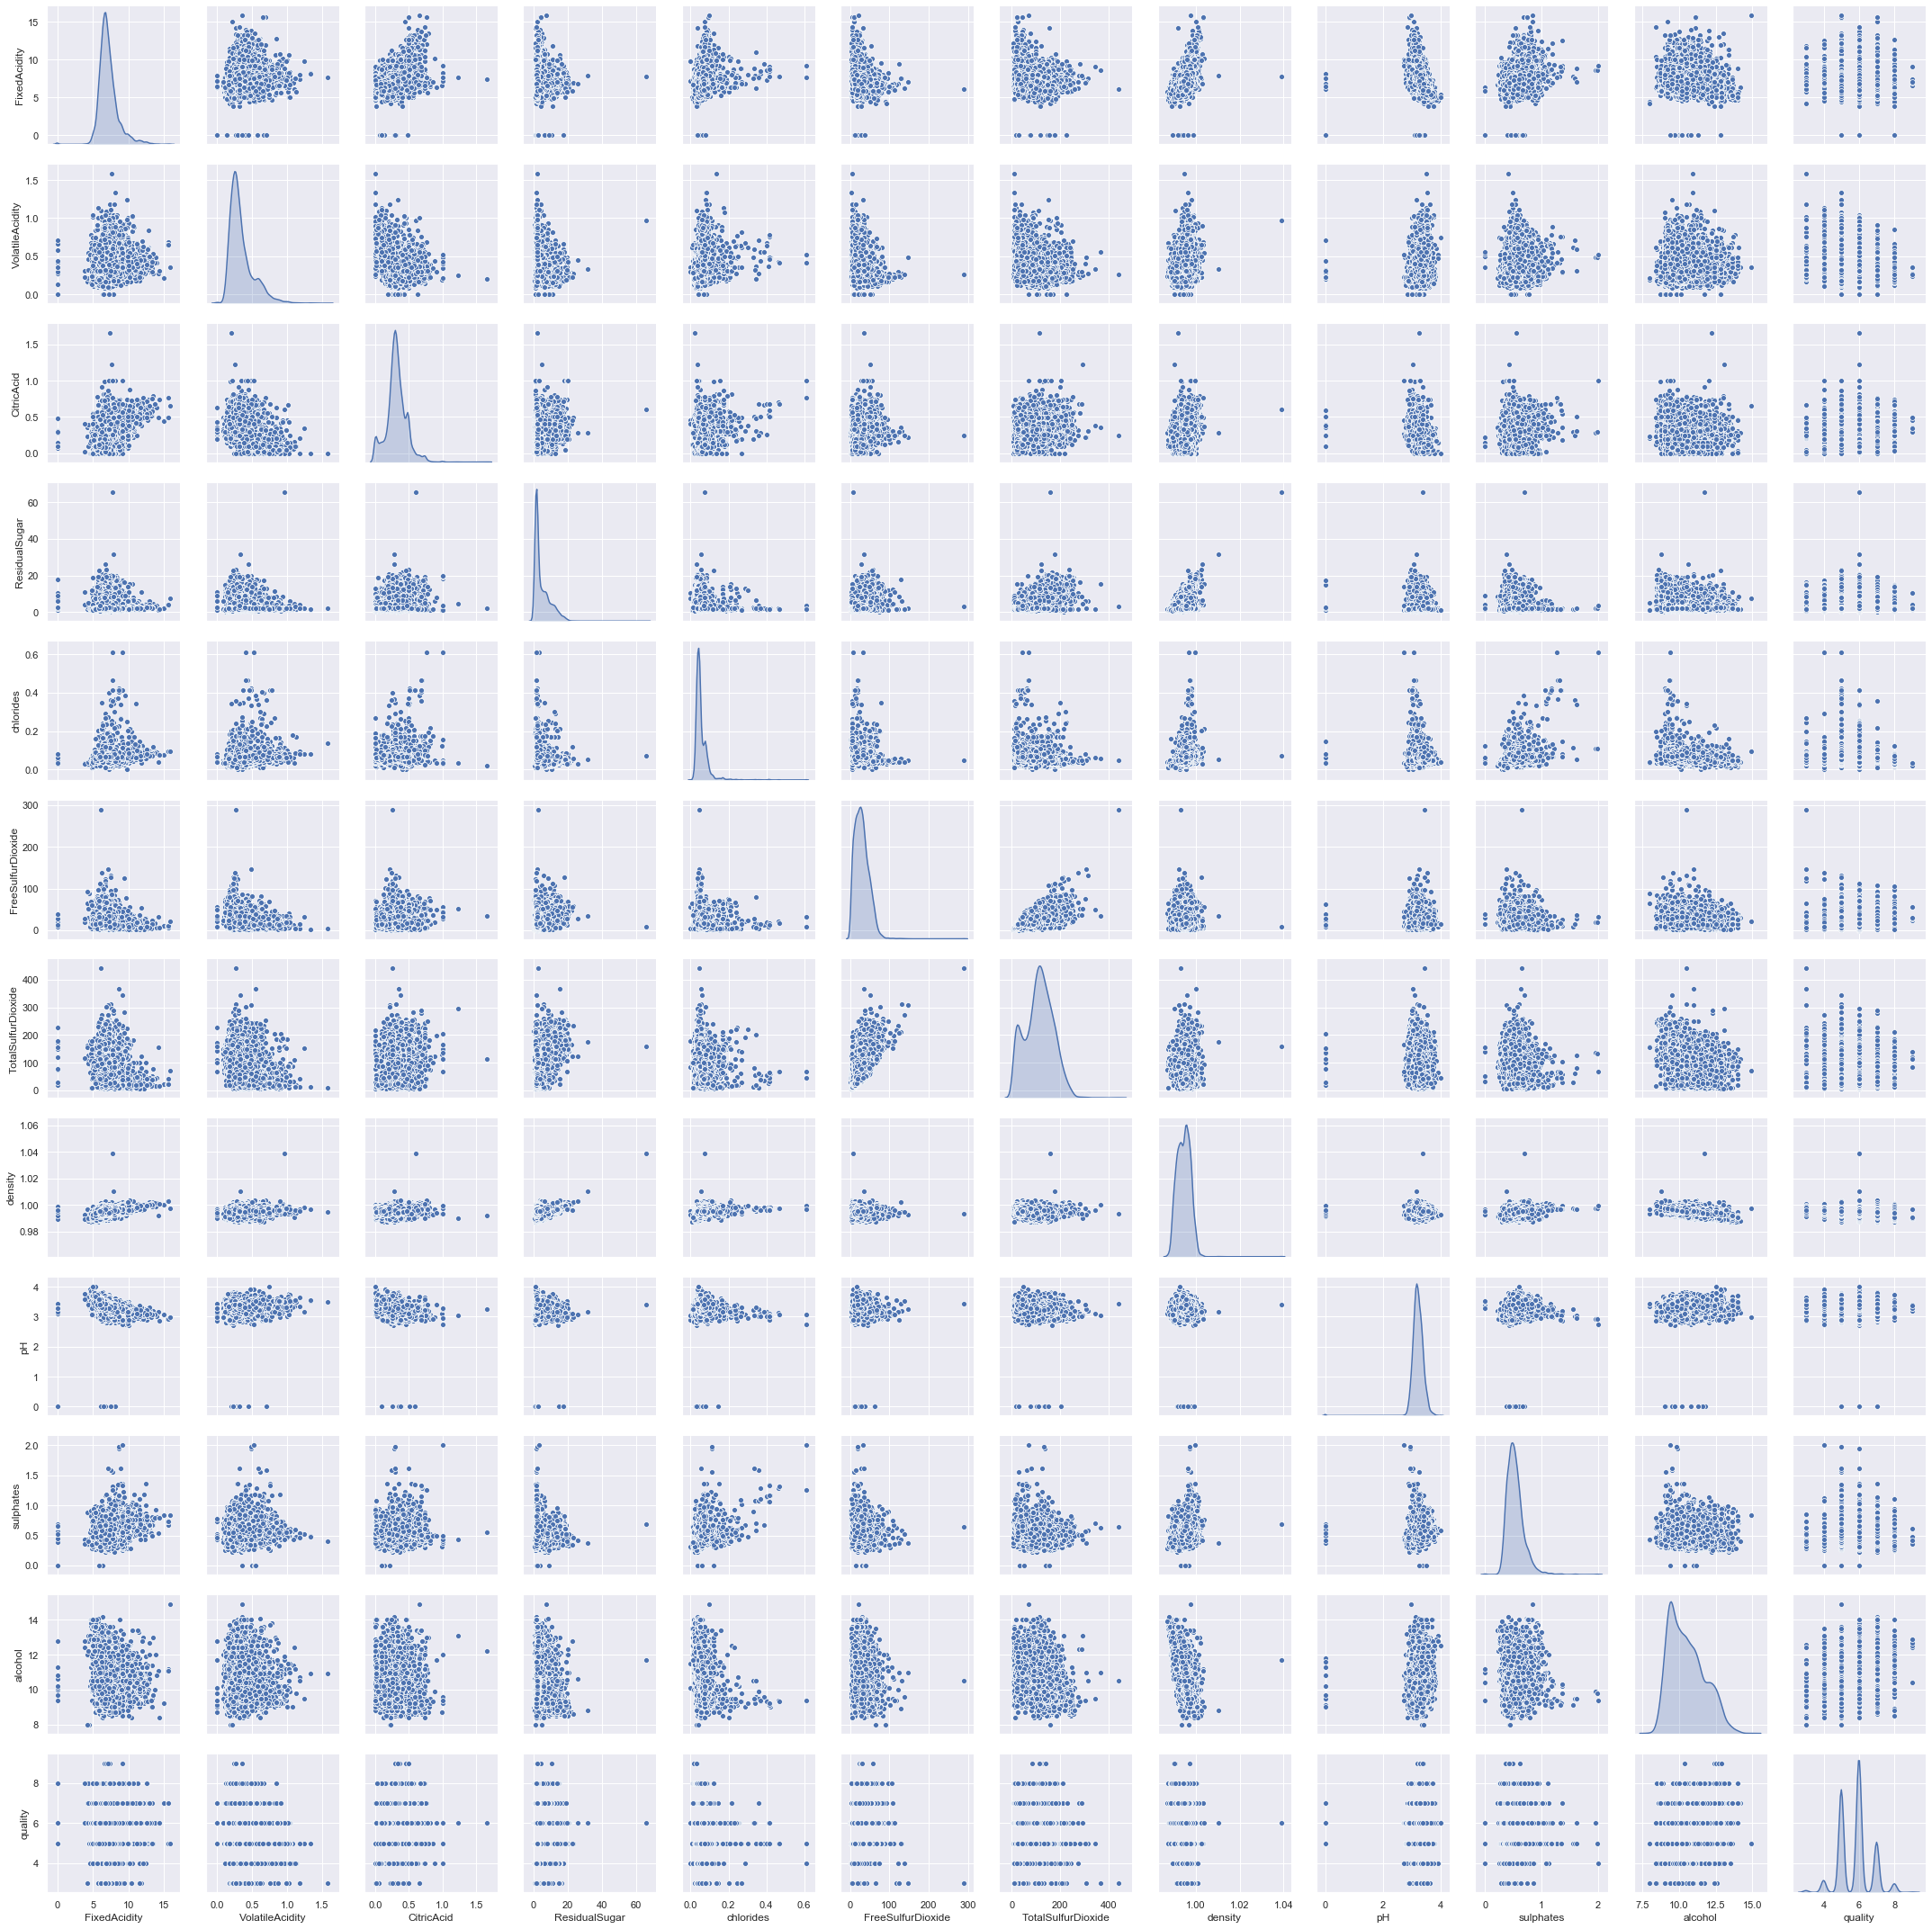

In [23]:
#Bivariate distribution 
plt.figure(figsize=(14, 14))
sns.pairplot(data, diag_kind='kde');

## To Check Outliers

In [24]:
#Preprocessing data-Dropping all categorical variables from our dataset
data=data.drop(['type'], axis=1)

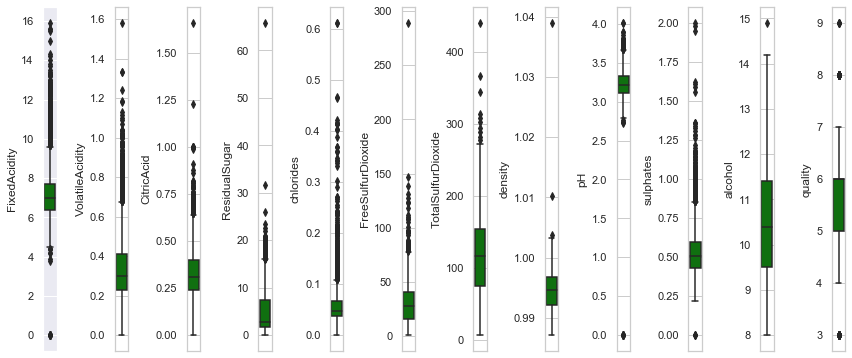

In [25]:
#Checking Outliers by plotting a box plot to each variable 
l = data.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]],color='green',orient='v')
    plt.tight_layout()

You can see except pH we have so many outliers in our dataset

# Removing Outliers

In [26]:
#Our shape of data before removing outliers
data.shape

(5329, 12)

### 1. Removing Outliers using IQR Method that is Inter Quantile Method

In [27]:
data.describe()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.203031,0.343607,0.318559,5.051942,0.056647,30.060143,114.189341,0.994536,3.218989,0.532867,10.548539,5.796022
std,1.354462,0.168629,0.147269,4.504224,0.036854,17.815588,56.781422,0.002966,0.207792,0.150379,1.186134,0.879922
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.987110,0.000000,0.000000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [28]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

FixedAcidity           1.30000
VolatileAcidity        0.18000
CitricAcid             0.16000
ResidualSugar          5.70000
chlorides              0.02800
FreeSulfurDioxide     25.00000
TotalSulfurDioxide    79.00000
density                0.00457
pH                     0.22000
sulphates              0.17000
alcohol                1.90000
quality                1.00000
dtype: float64


In [29]:
newdata = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(newdata.shape)

(4074, 12)


 After this method we have 4074 total rows in our dataset

### For more clean data removing outliers Using Z score method

In [30]:
from scipy import stats
z_scores = stats.zscore(newdata)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = newdata[filtered_entries]


In [31]:
new_df.shape

(4048, 12)

After Z score method we have finally 4048 total rows in our dataset and we can say data is PreProcessed and cleaned

# Correlation Matrix

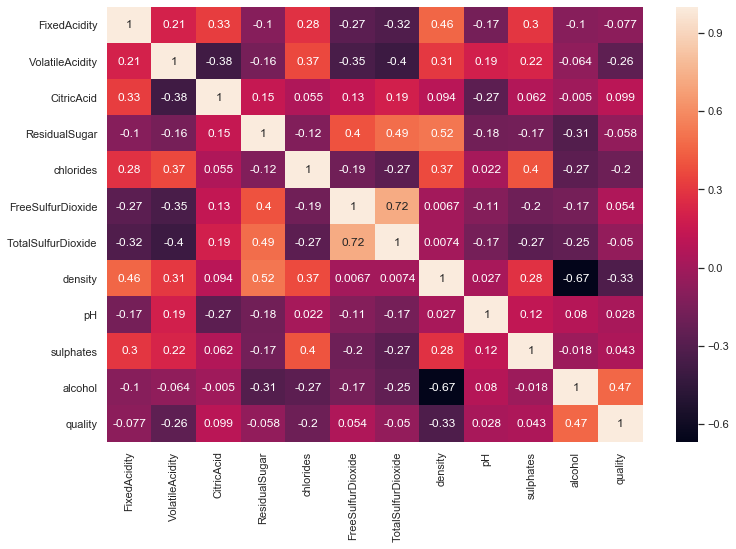

In [32]:
#CorelationMatrix
plt.figure(figsize=(12, 8))
datacorr = data.corr()
sns.heatmap(datacorr, xticklabels = datacorr.columns.values,yticklabels = datacorr.columns.values,annot = True)

Analuzing Corelation Matrix-

The Lighter color which is near one shows highly corelated

The Darker color shows less corelated

In our matrix we have more less corelated data in our dataset 

# Modeling

Importing Libraries for modeling 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
y=newdata.quality
X = newdata.drop('quality', axis=1)

# LogisticRegression

In [35]:
#Categorizing our data in train and test data taking 70 to 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


Our data prediction is 55%accurate

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        50
           5       0.61      0.61      0.61       380
           6       0.53      0.77      0.63       557
           7       0.46      0.06      0.10       236

    accuracy                           0.55      1223
   macro avg       0.40      0.36      0.33      1223
weighted avg       0.52      0.55      0.49      1223



C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,  27,  23,   0],
       [  0, 230, 148,   2],
       [  0, 114, 430,  13],
       [  0,   9, 214,  13]], dtype=int64)

In [38]:

#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print(y_test.head(5))


The prediction:

5
6
5
6
6

The expectation:

5006    6
4513    6
6134    6
6432    7
983     6
Name: quality, dtype: int64


You can see that here out of 5 datavalues 2 datavalues are predicted right and rest values have slight difference whic makes it upto 50% prediction of our dataset

# DecisionTree Model

In [39]:
simpleTree = DecisionTreeClassifier(max_depth=5)
simpleTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
simpleTree.score(X_test,y_test)

0.5429272281275552

In [41]:
predictions = simpleTree.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        50
           5       0.57      0.54      0.56       380
           6       0.53      0.69      0.60       557
           7       0.52      0.32      0.40       236

    accuracy                           0.54      1223
   macro avg       0.41      0.39      0.39      1223
weighted avg       0.52      0.54      0.52      1223



C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,  27,  18,   5],
       [  0, 204, 167,   9],
       [  0, 116, 384,  57],
       [  0,   8, 152,  76]], dtype=int64)

# Random Forest Model

In [48]:
rfTree = RandomForestClassifier(n_estimators=1000,max_depth=9)
rfTree.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rfTree.score(X_test,y_test)

0.5682747342600164

In [44]:
rfTree_pred = rfTree.predict(X_test)

In [45]:
predictions = rfTree.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        50
           5       0.61      0.63      0.62       380
           6       0.55      0.73      0.62       557
           7       0.64      0.24      0.35       236

    accuracy                           0.57      1223
   macro avg       0.45      0.40      0.40      1223
weighted avg       0.56      0.57      0.54      1223



C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,  28,  22,   0],
       [  0, 238, 140,   2],
       [  0, 122, 405,  30],
       [  0,   5, 175,  56]], dtype=int64)

# Summary

Decision tree gives accuracy of 54%
Logistic Regression gives accuracy of 55%
RandomForest Tree gives accuracy of 55%